In [ ]:
'''
- Hypothesis
- EDA - Charts (sns, Matplotlib, plotyly, Tableau)
- Pre-processings - (fixing errors, fixing Nulls, Outliers, ) VIF - groupy (Relashionship)
  - Feature Engineering (you do the feature engineering - LR)
  - Feature Learning
- Spilt train and test (Val) 
- Build your model
  - Define a model
  - Fit the model 
  - Perform prediction 
- Cross Validation
  - Decide your metrics 
- Look at the result -> Model - Change parameters 
- Searialize your model -> use it in real time predictions
'''

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime 
import seaborn as sns

In [4]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv")
submission = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_49d68Cx.csv")

In [61]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [60]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [9]:
test.shape

(367, 12)

In [10]:
train.shape

(614, 13)

In [12]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
'''
#Assumptions 
1. Hypothesis 
  Loan Amount - Loan Approval 
  - Loan Amount can be high - High income - Applicant income
  - If dependents exsist high of loan status - Y 
  - Age is middleish may more chances of approval 
  - Credit history could most important
  - SelfEmployed can influence approval 
'''

In [14]:
data = pd.concat([train,test],axis = 0)

In [17]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [16]:
data.loc[:, ~data.columns.isin(['Loan_Status'])].isna().sum().sort_values(ascending = False)

Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [26]:
data.loc[data['LoanAmount'].isna()]['Loan_Status'].value_counts()

Y    11
N    11
Name: Loan_Status, dtype: int64

In [ ]:
'''
fig, ax =plt.subplots(nrows=2, ncols=4)
sns.countplot(data= data, x = 'Loan_Status')
sns.countplot(data= data, x = 'Gender')
sns.countplot(data= data, x = 'Married')
sns.countplot(data= data, x = 'Education')
sns.countplot(data= data, x = 'Self_Employed')
sns.countplot(data= data, x = 'Property_Area')
sns.countplot(data= data, x = 'Dependents')
sns.countplot(data= data, x = 'Credit_History')

'''
'''
sns.countplot('Loan_Status',  data= data, ax = ax[0][0])
sns.countplot('Gender', data= data, ax = ax[0][1])
sns.countplot('Married', data= data, ax = ax[0][2])
sns.countplot('Education', data= data, ax = ax[0][3])
sns.countplot('Self_Employed', data= data, ax = ax[1][0])
sns.countplot('Property_area', data= data, ax = ax[1][1])
sns.countplot('Dependents', data= data, ax = ax[1][2])
sns.countplot('Credit_History', data= data, ax = ax[1][3])
'''

<Axes: xlabel='Loan_Status', ylabel='count'>

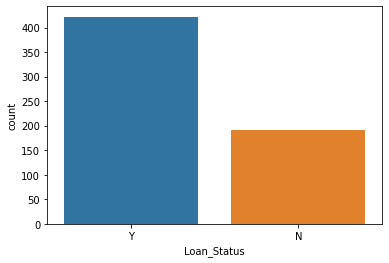

In [36]:
sns.countplot(data= data, x = 'Loan_Status')

<Axes: xlabel='Gender', ylabel='count'>

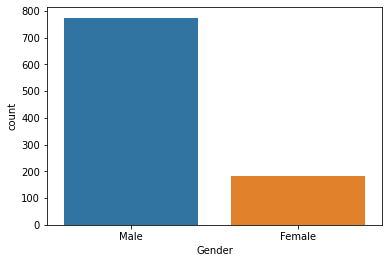

In [43]:
sns.countplot(data= data, x = 'Gender')

In [ ]:
for i in train.loc[:,~train.columns.isin(['Loan_ID'])].select_dtypes(exclude = np.number).columns:
  train[i].value_counts().plot.pie(subplots = True, figsize = (11,6),autopct= '%1.1f%%')
  plt.show()

In [ ]:
for i in train.loc[:,~train.columns.isin(['Loan_ID'])].select_dtypes(exclude = np.number).columns:
  train[i].value_counts().plot.pie(subplots = True, figsize = (11,6),autopct= '%1.1f%%')
  sns.countplot(x = 'Loan_Status', hue = i, data = train)
  plt.show()

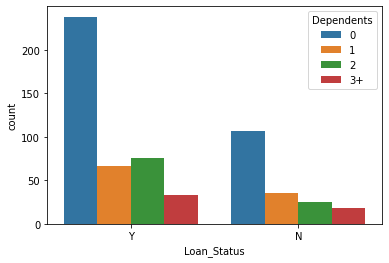

In [52]:
#train['Dependents'].value_counts().plot.pie(subplots = True, figsize = (11,6),autopct= '%1.1f%%')
sns.countplot(x = 'Loan_Status', hue = 'Dependents', data = train)
plt.show()

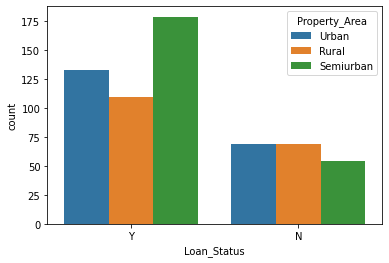

In [59]:
#train['Dependents'].value_counts().plot.pie(subplots = True, figsize = (11,6),autopct= '%1.1f%%')
sns.countplot(x = 'Loan_Status', hue = 'Property_Area', data = train)
plt.show()

In [54]:
#Credit History 
data['Credit_History']= data['Credit_History'].fillna(0.0)

In [55]:
data['Gender'] = data['Gender'].fillna(data['Gender'].value_counts().index[0])

In [ ]:
#loan_term 
data.groupby(['Gender','Married','Education','Dependents'])['Loan_Amount_Term'].median()